**Digit recognizer MNIST Dataset With CNN**

This notebook walks you through how to train a CNN model using Keras on the MNIST dataset made available for this competition.

![](https://miro.medium.com/v2/resize:fit:720/0*u5-PcKYVfUE5s2by.gif)

**Description:**\
The provided description explains that the dataset consists of images of hand-drawn digits, where each image is a 28x28 matrix of pixel values. 
Here's a more concise summary of the information:

* **Dataset**: train.csv and test.csv
* **Image Format**: Gray-scale images of hand-drawn digits (0 through 9)
* **Image Size**: 28 pixels in height and 28 pixels in width, totaling 784 pixels
* **Pixel Values**: Each pixel has an integer value between 0 and 255 (indicating lightness/darkness)
* **Training Data Columns**: 785 columns in total
    *     Column 1: "label" (digit drawn by the user)
    *     Columns 2 to 785: pixel values of the associated image
* **Pixel Column Names**: pixel0, pixel1, ..., pixel783
* **Pixel Location**: pixel x is located at row i and column j of a 28x28 matrix, where x = i * 28 + j

*Winning a competition like the MNIST digit recognizer on Kaggle requires a combination of techniques and strategies. Here's a step-by-step guide and Python code to help you get started. Winning a competition depends on various factors including the techniques you use, feature engineering, and model selection. Please note that competition results can change over time as new techniques emerge, so it's essential to stay updated with the latest methods.*

**Import Libraries and Load Data**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.models import Sequential

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


**Load the MNIST dataset**

In [6]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

**Split the data into features (X) and labels (y)**

In [7]:
X = train.drop("label", axis=1).values
y = train["label"].values
X_test = test.values

**Data Preprocessing:**

* Reshape the data into 28x28 pixel images.
* Normalize the pixel values to a range of [0, 1].

In [8]:
X = X.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

**Split Data into Training and Validation Sets:**

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Data Augmentation**

In [10]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

**Learning Rate Scheduler**

In [11]:
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch < 5:
        return initial_lr
    else:
        return initial_lr * tf.math.exp(0.1 * (5 - epoch))

lr_scheduler = LearningRateScheduler(lr_schedule)


**Early Stopping**

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

**Build a Convolutional Neural Network (CNN):**

* CNNs are well-suited for image classification tasks.

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train the Model:**

In [14]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/30
525/525 [==============================] - 69s 125ms/step - loss: 0.7593 - accuracy: 0.7656 - val_loss: 0.2491 - val_accuracy: 0.9242 - lr: 0.0010
Epoch 2/30
525/525 [==============================] - 66s 126ms/step - loss: 0.2870 - accuracy: 0.9100 - val_loss: 0.0705 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 3/30
525/525 [==============================] - 66s 125ms/step - loss: 0.2085 - accuracy: 0.9348 - val_loss: 0.0606 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 4/30
525/525 [==============================] - 66s 125ms/step - loss: 0.1773 - accuracy: 0.9457 - val_loss: 0.0634 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 5/30
525/525 [==============================] - 66s 126ms/step - loss: 0.1539 - accuracy: 0.9521 - val_loss: 0.0542 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 6/30
525/525 [==============================] - 66s 126ms/step - loss: 0.1491 - accuracy: 0.9543 - val_loss: 0.0464 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 7/30
525/525 [==============================] 

**Plot training history :**

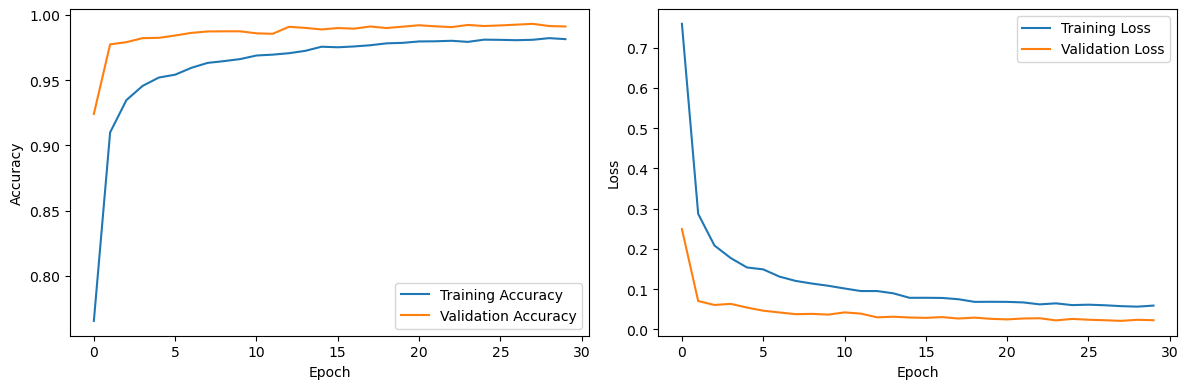

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Evaluate the Model on Validation Set :**

In [16]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

263/263 [==============================] - 4s 16ms/step - loss: 0.0227 - accuracy: 0.9912
Validation Loss: 0.02271333709359169, Validation Accuracy: 0.991190493106842


**Plot training history :**

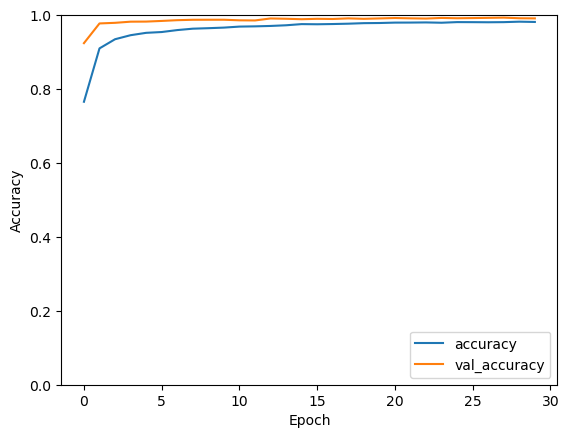

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

**Make Predictions:**

In [18]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)


875/875 [==============================] - 14s 15ms/step


**Create a Submission File:**

In [19]:
submission = pd.DataFrame({'ImageId': np.arange(1, len(y_pred_labels) + 1), 'Label': y_pred_labels})
submission.to_csv("submission.csv", index=False)

**Visualize some sample predictions :**

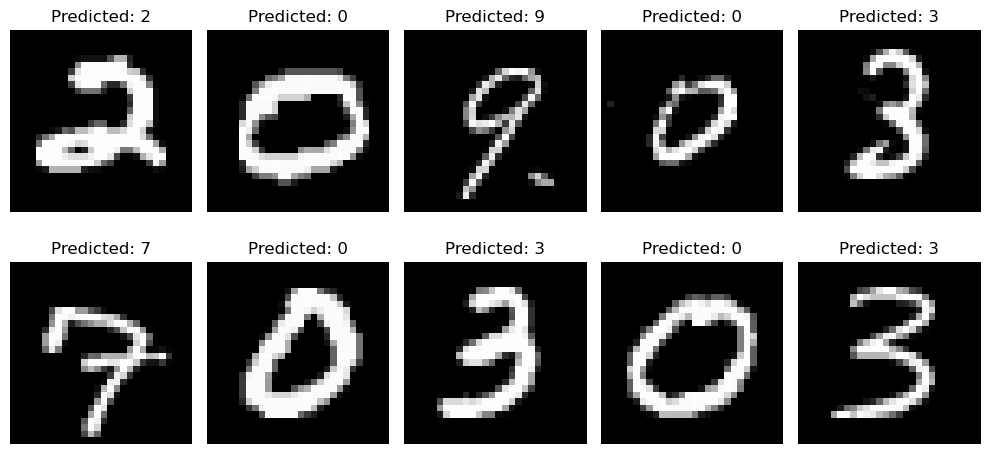

In [20]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()